<a href="https://colab.research.google.com/github/annaphuongwit/ML-OPs/blob/main/03_github_push_pull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pushing and Pulling

In this notebook, you'll act as two different developers working on the same project. We'll use the two project folders you created in the last exercise to represent two separate computers:

* Developer A will use `sentiment-analysis-project/`.
* Developer B will use `sentiment-clone-test/sentiment-analysis-project/`.

This simulation will teach you the daily rhythm of `git push` and `git pull` and, most importantly, how to handle the common conflicts that arise when working in a team.

> Throughout this notebook we will switch between Developer A (👨‍🦰) and Developer B (👩‍🦳). These will be two different windows on your screen that look very much alike. Be careful setting up your workspace so you can easily tell the difference.

> All commands in this notebook should be run in your terminal. Remember to type them out to build muscle memory!

---
## 1.&nbsp; The Basic Push/Pull Cycle ↕️

Let's start with a simple change to get comfortable with the basic synchronisation workflow.

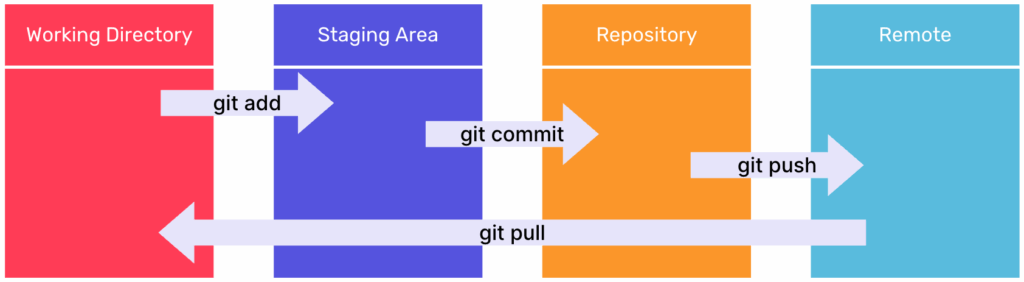

### 1.1. 👨‍🦰 Developer A: Make and Push a Change

1.  Open your `sentiment-analysis-project` folder in VS Code. Then, open the integrated terminal. The terminal should automatically start in your project directory.
2.  In the VS Code Explorer on the left, click on the `README.md` file to open it. Change the title from `# Sentiment Analysis Project` to `# Sentiment Analysis Pipeline`.
3.  In the integrated terminal, stage and commit this change.

In [ ]:
git diff

In [ ]:
git add README.md

In [ ]:
git commit -m "docs: Update project title to Sentiment Analysis Pipeline"

4.  Now, push your commit to the remote repository on GitHub. This sends your changes "upstream" for others to see.

In [ ]:
git push

### 1.2. 👩‍🦳 Developer B: Pull the Change

⚠️ This will get a bit complicated as you will have 2 windows that look similar with 2 code bases that look similar. Be vigilant and careful with how you set up you windows.

1.  Open a new, separate VS Code window. Open your second project directory `sentiment-clone-test/sentiment-analysis-project`.
2.  Check your `README.md` file. The title is still the old one. Your local repository doesn't know about the changes yet.
3.  Pull the changes from the remote repository. This fetches the new history and merges it into your local branch.

In [ ]:
git pull

4.  Check `README.md` again. It's now updated! Run `git log --oneline` to see that Developer A's commit is now part of your local history.

---
## 2.&nbsp; Building the Prediction Script 📝

Now for a more significant piece of work. Developer A will build the new prediction script in logical stages, pushing as they go.

### 2.1. 👨‍🦰 Developer A: Create the Prediction Script Structure

1.  In your Developer A terminal (`sentiment-analysis-project`), create a new file: `src/predict.py`.
2.  Add the initial code to this file. This includes the necessary imports, a `load` function, and the `argparse` setup.

    ```python
    import argparse
    from typing import Any
    import numpy as np
    from numpy.typing import NDArray
    from joblib import load


    def load_model(model_path: str) -> Any:
        """Load and return a trained classifier."""
        return load(model_path)

    
    # Other functions will go here
    

    if __name__ == "__main__":
        parser = argparse.ArgumentParser()
        parser.add_argument("--model", default="models/sentiment.joblib")
        parser.add_argument("text", nargs="+", help="One or more texts to score")
        args = parser.parse_args()
        main(model_path=args.model, input_texts=args.text)
    ```
3.  Save, stage, and commit this initial structure.

In [ ]:
git add src/predict.py

In [ ]:
git commit -m "feat: Add initial structure for predict.py"

4.  Push this commit. It's good practice to share your work early.

In [ ]:
git push

---
## 3.&nbsp; The Interruption & The Inevitable Conflict ➡️⬅️

This section simulates a common scenario where work happens in parallel on the same file, which will lead to a merge conflict.

### 3.1. 👩‍🦳 Developer B: Add Documentation

1.  In your Developer B terminal (`sentiment-clone-test`), run `git pull` to get the new `src/predict.py` file.
2.  You've noticed the `README.md` is missing instructions for the new script. Open `README.md` and add the `## Predict` section as shown below. It should go below the `## Train` section.

In [ ]:
## Predict
python src/predict.py "I absolutely loved it" "That was awful"
# Output format: label  probability  text
# Example:
# 1    0.982    I absolutely loved it
# 0    0.015    That was awful

3.  Commit and push this documentation update.

In [ ]:
git diff

In [ ]:
git add README.md

In [ ]:
git commit -m "docs: Add usage instructions for predict script"

In [ ]:
git push

### 3.2. 👨‍🦰 Developer A: Finish the Feature (and create a conflict)

1.  Back in your Developer A terminal, you're unaware of Developer B's documentation change. Your task is to finish the prediction script and add the documentation for it.
2.  First, open `src/predict.py` and replace the `# Other functions will go here` comment with the final, working logic.

In [ ]:
def predict_texts(
        classifier: Any,
        input_texts: list[str]
) -> tuple[list[int], list[float | None]]:
    """Return labels and probability-of-positive for each text."""
    preds: NDArray[Any] = classifier.predict(input_texts)
    if hasattr(classifier, "predict_proba"):
        probs_arr: NDArray[np.float64] = classifier.predict_proba(input_texts)[:, 1]
        probs = [float(p) for p in probs_arr.tolist()]
    else:
        probs = [None] * len(input_texts)
    return preds.astype(int).tolist(), probs


def format_prediction_lines(
        texts: list[str],
        preds: list[int],
        probs: list[float | None]
) -> list[str]:
    """Return tab-separated CLI output lines for each input text."""
    lines: list[str] = []
    for text, pred, prob in zip(texts, preds, probs):
        if prob is None:
            lines.append(f"{pred}\t{text}")
        else:
            lines.append(f"{pred}\t{prob:.3f}\t{text}")
    return lines


def main(
        model_path: str,
        input_texts: list[str]
) -> None:
    classifier = load_model(model_path)
    preds, probs = predict_texts(classifier, input_texts)
    for line in format_prediction_lines(input_texts, preds, probs):
        print(line)

3.  Commit your completed script logic. **Do not push yet.**

In [ ]:
git diff

In [ ]:
git add src/predict.py

In [ ]:
git commit -m "feat: Implement prediction and reporting logic"

4.  Now, open `README.md` - still as Developer A. You also, as the diligent developer that you are, add the `## Predict` section instructions. But you have a slightly different syle to Developer B
    ```
    ## Predict
    Run the predictions in the command line. Use any sentence you like.

    python src/predict.py "That was the best" "I'm happy "Whoa! That's terrible" "That's so bad"
    ```
5.  Commit your documentation update.

In [ ]:
git dif

In [ ]:
git add README.md

In [ ]:
git commit -m "docs: Add predict instructions to README"

---
## 4.&nbsp; Handling a Real-World Conflict 🤝

You (as Developer A) are now ready to share your finished feature. This is where you'll encounter and resolve the conflict.

### 4.1.👨‍🦰 Developer A: Push and Resolve

1.  In your Developer A terminal, try to push your two new commits.

In [ ]:
git push

2.  Error! Git will reject your push. This is Git protecting you. It's telling you that the remote repository has changes that you don't have locally. You must integrate them before you can push.

3.  Follow Git's advice and run `git pull`.

In [ ]:
git pull

4. The pull will likely fail. Git couldn't automatically merge the changes because both you and Developer B edited the same lines in the same file.
  > When you run `git pull` and your local branch has new commits that the remote branch doesn't, and the remote branch has new commits that your local branch doesn't, their histories have diverged. Git stops and ask you to make a conscious choice about how you want to combine these two different histories. This prevents accidental or unwanted changes to your project's log.
  > * **Merge (`pull.rebase false`)** This creates a new merge commit that ties the two divergent histories together. This preserves the exact, chronological history of what happened but can make your project log look a bit cluttered with merge messages.
  > * **Rebase (`pull.rebase true`)** This is the "clean history" strategy. It takes your local changes, pulls the remote changes, and then reapplies your changes on top of them. This makes your project history look like a single, straight line, as if you had done all your work *after* the remote changes were made.
  > * **Fast-Forward Only (`pull.ff-only`)** This is the strictest strategy. It will only allow a pull to succeed if your local branch has no new commits since you last synced with the remote. If both branches have changed, the pull will fail, forcing you to manually decide how to combine the histories.
  >
  > For most developers, especially when working in a team, the merge (`pull.rebase false`) strategy is the best and safest default. It's transparent and doesn't rewrite history, which prevents a lot of confusion for your colleagues.

Setting a global default is a good idea. It makes your `git pull` command predictable and prevents this error from interrupting your work. To set merge as your default strategy for all your projects, you can run this one-time command:

In [ ]:
git config --global pull.rebase false

5. Now that Git knows how you'd like to merge the files, try to pull again, and this time you should see the conflicts in your editor.


In [ ]:
git pull

6.  To resolve the conflict. Open `README.md` in your code editor. You will see the conflict markers:

    ```markdown
    <<<<<<< HEAD
    ## Predict
    # ... (your version)
    =======
    ## Predict
    # ... (the version from the remote)
    >>>>>>> [commit hash]
    ```
    Your task is to edit this file into its final, correct state. Since both changes were identical, simply delete the conflict markers and one of the duplicate `## Predict` sections. Save the file.
7.  To finalise the merge, you must tell Git that you've resolved the conflict. First, stage the corrected file.

In [ ]:
git add README.md

8. Commit your changes.

In [ ]:
git commit -m "docs: README - Clarify usage instructions for predict"

7.  With the conflict resolved and the merge committed, you can now successfully push all your work to GitHub.

In [ ]:
git push

### 4.1. 👩‍🦳 Developer B: See the changes

1. Back in your Developer B window pull the nex changes.

In [ ]:
git pull

2. You should see the changes you made to the Predict instructions.

---
## 5.&nbsp; A Professional Workflow 🧑‍💻

Congratulations! You've successfully navigated a complete, realistic collaborative workflow. You've learned:

* The fundamental rhythm of **pulling** before you start work and **pushing** when you've completed a logical change.
* How to interpret and resolve a **push rejection** by pulling first.
* How to read conflict markers and confidently resolve a **merge conflict**.

Conflicts are not errors; they are a normal and manageable part of working on a team. By mastering this workflow, you've gained one of the most important skills for any professional developer or data scientist.

---
## 6.&nbsp; Final Project State 📌

To verify your work, your final `src/predict.py` and `README.md` files should look like this.

### src/predict.py

In [ ]:
import argparse
from typing import Any

import numpy as np
from numpy.typing import NDArray
from joblib import load


def load_model(model_path: str) -> Any:
    """Load and return a trained classifier."""
    return load(model_path)


def predict_texts(
        classifier: Any,
        input_texts: list[str]
) -> tuple[list[int], list[float | None]]:
    """Return labels and probability-of-positive for each text."""
    preds: NDArray[Any] = classifier.predict(input_texts)
    if hasattr(classifier, "predict_proba"):
        probs_arr: NDArray[np.float64] = classifier.predict_proba(input_texts)[:, 1]
        probs = [float(p) for p in probs_arr.tolist()]
    else:
        probs = [None] * len(input_texts)
    return preds.astype(int).tolist(), probs


def format_prediction_lines(
        texts: list[str],
        preds: list[int],
        probs: list[float | None]
) -> list[str]:
    """Return tab-separated CLI output lines for each input text."""
    lines: list[str] = []
    for text, pred, prob in zip(texts, preds, probs):
        if prob is None:
            lines.append(f"{pred}\t{text}")
        else:
            lines.append(f"{pred}\t{prob:.3f}\t{text}")
    return lines


def main(
        model_path: str,
        input_texts: list[str]
) -> None:
    classifier = load_model(model_path)
    preds, probs = predict_texts(classifier, input_texts)
    for line in format_prediction_lines(input_texts, preds, probs):
        print(line)


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--model", default="models/sentiment.joblib")
    parser.add_argument("text", nargs="+", help="One or more texts to score")
    args = parser.parse_args()
    main(model_path=args.model, input_texts=args.text)


### README.md

In [ ]:
# Sentiment Analysis Pipeline

## Setup

### Option 1: Python venv
python -m venv .venv
source .venv/bin/activate  # Windows: .venv\Scripts\activate
pip install -r requirements.txt

### Option 2: Conda
conda create -n sentiment-env python=3.11 -y
conda activate sentiment-env
pip install -r requirements.txt

## Train
python src/train.py --data data/train.csv --out models/sentiment.joblib

## Predict
python src/predict.py "I absolutely loved it" "That was awful"
# Output format: label  probability  text
# Example:
# 1    0.982    I absolutely loved it
# 0    0.015    That was awful

☝️ You can now use your classifier to make predictions. Give it a go.